# _Netflix Recommendation System using Python_

<img src='../data/dataset.png'>

_Netflix, kullanıcılarına reklamsız olarak film ve dizi izleme imkânı sunan abonelik tabanlı bir dijital yayın platformudur. Netflix’in dünya çapında bu kadar popüler olmasının en önemli nedenlerinden biri, kullanıcıların ilgi alanlarına göre içerik öneren gelişmiş öneri sistemidir._

_Bu projede, Kaggle üzerinden elde edilen gerçek bir Netflix veri seti kullanılarak **Python ile bir Netflix Öneri Sistemi** geliştirilmiştir. Projenin temel amacı, film ve dizilerin içerik bilgilerini analiz ederek kullanıcılara ilgi alanlarına uygun öneriler sunmaktır._

### _🎯 Projenin Amaçları_
- _Netflix içerik verilerini analiz etmek ve veri ön işleme adımlarını uygulamak_
- _Farklı öneri sistemi yaklaşımlarını gerçek bir veri seti üzerinde uygulamak_
- _Film ve dizileri içerik benzerliği ve popülerlik kriterlerine göre önermek_
- _Gerçek hayatta kullanılan öneri sistemlerinin temel mantığını öğrenmek_

### _🧠 Kullanılan Öneri Yaklaşımları_
_Bu projede aşağıdaki öneri sistemleri uygulanmıştır:_

1. _**Popülerlik Tabanlı Öneri Sistemi**_
   - _IMDb puanı yüksek ve popüler içerikleri önerir_
   - _Yeni kullanıcılar için (cold start problemi) uygundur_

2. _**İçerik Tabanlı Öneri Sistemi (Content-Based)**_
   - _Tür, açıklama, oyuncular ve yönetmen bilgilerini kullanır_
   - _TF-IDF ve Cosine Similarity yöntemleri ile benzer içerikler önerir_

3. _**Tür (Genre) Tabanlı Benzerlik**_
   - _İçeriklerin tür bilgilerine göre benzerlik hesaplar_
   - _Kullanıcının ilgi duyduğu kategoriye göre öneriler sunar_

_Bu proje, veri bilimi ve makine öğrenmesi alanında öneri sistemlerini öğrenmek isteyen öğrenciler için temel ve anlaşılır bir örnek sunmaktadır._

## _Libraries & Dataset_

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/netflixData.csv")

In [3]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


## _Data Cleaning & Preparation_

In [4]:
df.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [5]:
df = df.dropna(subset=["Title", "Description", "Genres"])

In [6]:
df["Director"] = df["Director"].fillna("Unknown")
df["Cast"] = df["Cast"].fillna("Unknown")
df["Production Country"] = df["Production Country"].fillna("Unknown")
df["Rating"] = df["Rating"].fillna("Unknown")

In [7]:
df.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director                 0
Genres                   0
Cast                     0
Production Country       0
Release Date             3
Rating                   0
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [8]:
df["Release Date"] = df["Release Date"].fillna(df["Release Date"].median())

In [9]:
df["Duration"] = df["Duration"].fillna("Unknown")
df["Date Added"] = df["Date Added"].fillna("Unknown")

## _Netflix Data Visualization_

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### _İçerik Türü Dağılımı (Movie vs TV Show)_

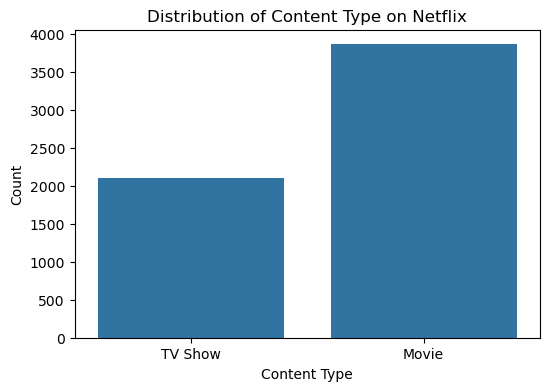

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Content Type", data=df)
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

### _En Popüler Türler (Genres)_

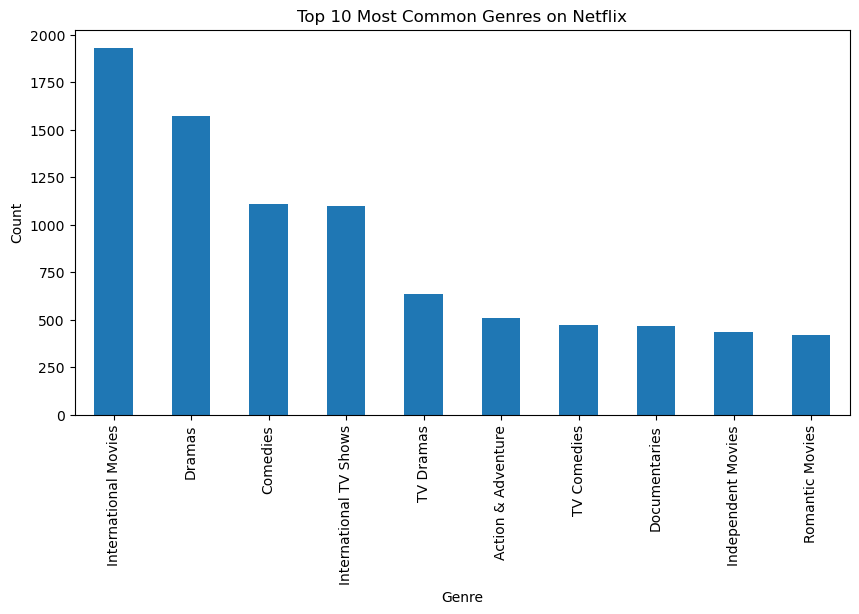

In [12]:
genres = df["Genres"].str.split(", ").explode()

plt.figure(figsize=(10,5))
genres.value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

### _Yıllara Göre İçerik Üretimi_

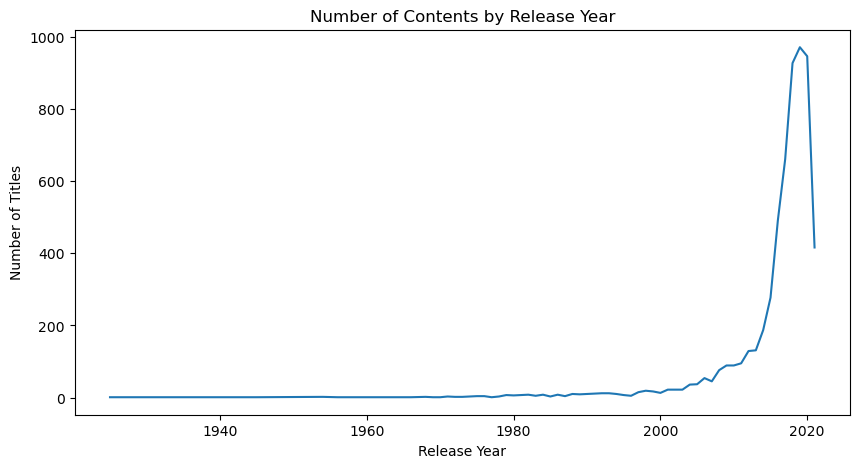

In [13]:
plt.figure(figsize=(10,5))
df["Release Date"].value_counts().sort_index().plot()
plt.title("Number of Contents by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

### _Ülkelere Göre İçerik Dağılımı_

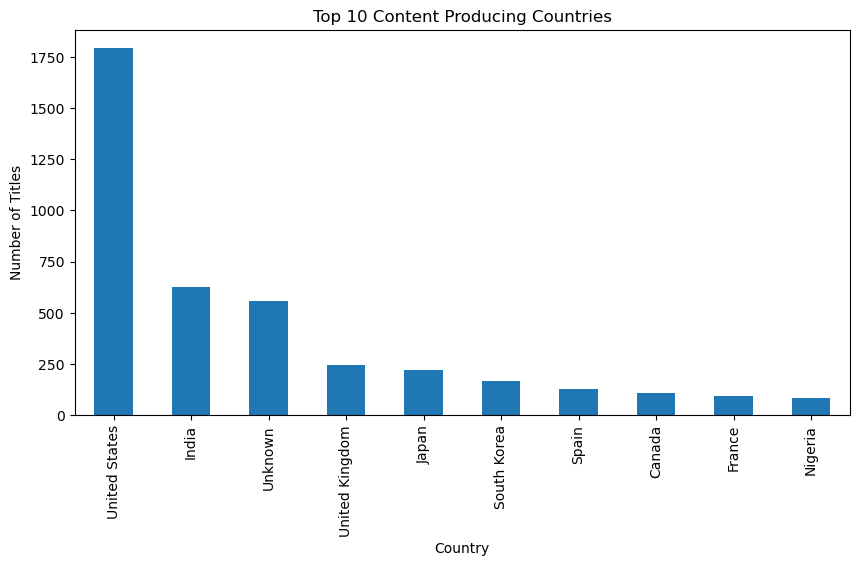

In [14]:
plt.figure(figsize=(10,5))
df["Production Country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

## _Popularity-Based Recommendation_

_En yüksek IMDb puanına sahip içerikler_

In [15]:
df["Imdb Score"] = df["Imdb Score"].str.replace("/10", "").astype(float)

popular_movies = (
    df.sort_values("Imdb Score", ascending=False)
      .loc[:, ["Title", "Genres", "Imdb Score", "Content Type"]]
      .head(10)
)

popular_movies

,Title,Genres,Imdb Score,Content Type
800,Breaking Bad,"Crime TV Shows, TV Dramas, TV Thrillers",9.4,TV Show
461,Avatar: The Last Airbender,"Classic & Cult TV, Kids' TV, TV Action & Adven...",9.3,TV Show
3572,Our Planet,"Docuseries, Science & Nature TV",9.2,TV Show
4965,The Last Dance,Docuseries,9.2,TV Show
3913,Reply 1988,"International TV Shows, Korean TV Shows, Roman...",9.2,TV Show
2701,Leyla and Mecnun,"International TV Shows, Romantic TV Shows, TV ...",9.1,TV Show
5280,The Untamed,"International TV Shows, TV Action & Adventure,...",9.1,TV Show
1208,David Attenborough: A Life on Our Planet,Documentaries,9.1,Movie
740,Bo Burnham: Inside,Stand-Up Comedy,9.0,Movie
3423,No Longer kids,"Comedies, Dramas, International Movies",9.0,Movie


## _Content-Based Recommendation (Cosine Similarity)_

### _Feature Engineering_

In [16]:
df["combined_features"] = (
    df["Genres"] + " " +
    df["Description"] + " " +
    df["Cast"] + " " +
    df["Director"]
)

### _TF-IDF Vectorization_

In [17]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["combined_features"])

### _Cosine Similarity Matrix_

In [18]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

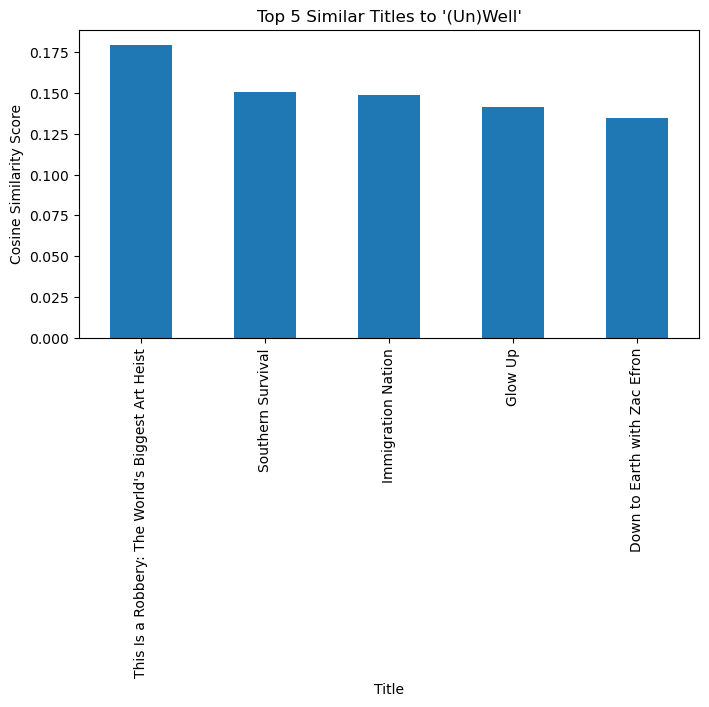

In [25]:
title = "(Un)Well"
idx = indices[title]

sim_scores = pd.Series(cosine_sim[idx], index=df["Title"])
top_similar = sim_scores.sort_values(ascending=False)[1:6]

plt.figure(figsize=(8,4))
top_similar.plot(kind="bar")
plt.title(f"Top 5 Similar Titles to '{title}'")
plt.ylabel("Cosine Similarity Score")
plt.show()

## _Recommendation Function_

In [24]:
indices = pd.Series(df.index, index=df["Title"]).drop_duplicates()

def recommend(title, n=5):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    
    movie_indices = [i[0] for i in sim_scores]
    return df.iloc[movie_indices][["Title", "Genres", "Imdb Score"]]

### _Example Recommendation_

In [26]:
recommend("(Un)Well")

,Title,Genres,Imdb Score
5355,This Is a Robbery: The World's Biggest Art Heist,"Crime TV Shows, Docuseries, TV Mysteries",NaN
4355,Southern Survival,Reality TV,5.9
2215,Immigration Nation,Docuseries,7.3
1840,Glow Up,"British TV Shows, International TV Shows, Real...",6.6
1370,Down to Earth with Zac Efron,"Docuseries, Reality TV, Science & Nature TV",8.2


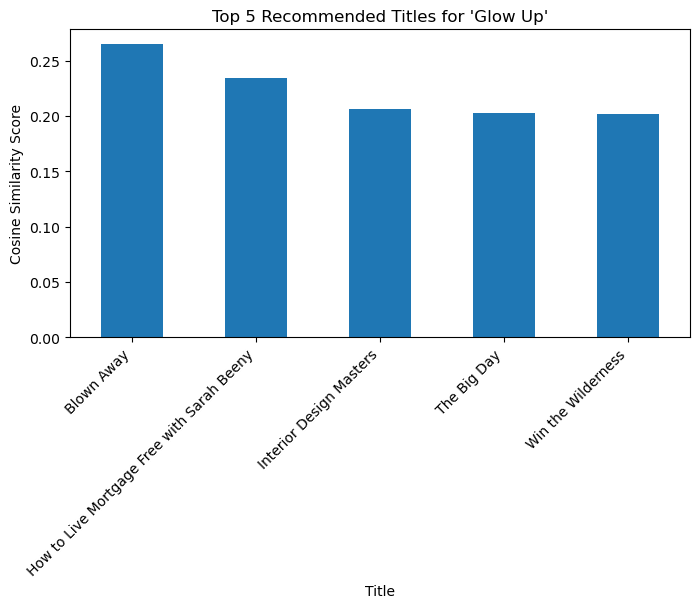

In [27]:
title = "Glow Up"
idx = indices[title]

sim_scores = pd.Series(cosine_sim[idx], index=df["Title"])
top_similar = sim_scores.sort_values(ascending=False)[1:6]

plt.figure(figsize=(8,4))
top_similar.plot(kind="bar")
plt.title(f"Top 5 Recommended Titles for '{title}'")
plt.xlabel("Title")
plt.ylabel("Cosine Similarity Score")
plt.xticks(rotation=45, ha="right")
plt.show()

## _Genre-Based Similarity_

In [28]:
genre_matrix = df["Genres"].str.get_dummies(sep=", ")
genre_similarity = cosine_similarity(genre_matrix)

In [29]:
genre_sim_df = pd.DataFrame(
    genre_similarity,
    index=df["Title"],
    columns=df["Title"]
)

In [30]:
genre_sim_df["(Un)Well"].sort_values(ascending=False)[1:6]

Title
Forged in Fire          1.0
Westside                1.0
(Un)Well                1.0
Ultimate Beastmaster    1.0
60 Days In              1.0
Name: (Un)Well, dtype: float64

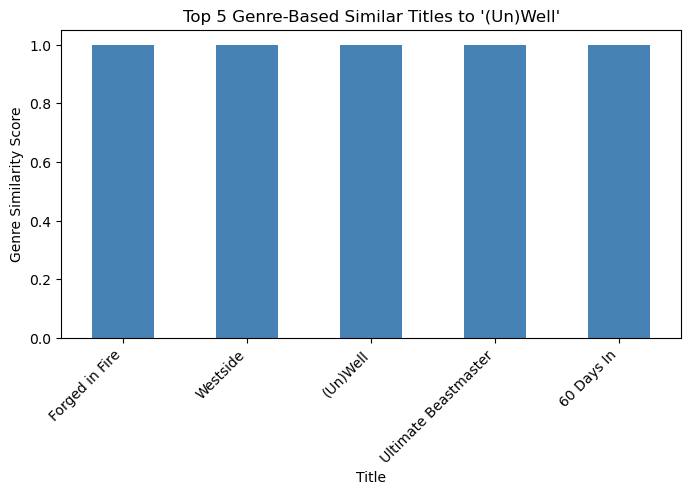

In [31]:
top_genre_sim = genre_sim_df["60 Days In"].sort_values(ascending=False)[1:6]

plt.figure(figsize=(8,4))
top_genre_sim.plot(kind="bar", color="steelblue")
plt.title("Top 5 Genre-Based Similar Titles to '(Un)Well'")
plt.xlabel("Title")
plt.ylabel("Genre Similarity Score")
plt.xticks(rotation=45, ha="right")
plt.show()

## _Save everything needed_

In [32]:
import pickle

In [33]:
with open("netflix_model.pkl", "wb") as f:
    pickle.dump((df, cosine_sim), f)

## _Proje Sonucu_

_Bu projede, Netflix platformundaki film ve diziler için farklı yaklaşımlar kullanılarak bir öneri sistemi başarıyla geliştirilmiştir. Proje kapsamında veri temizleme, özellik çıkarımı ve benzerlik hesaplama adımları detaylı bir şekilde uygulanmıştır._

### _📊 Elde Edilen Sonuçlar_
- _Netflix veri seti analiz edilerek eksik ve hatalı veriler temizlenmiştir_
- _Popülerlik tabanlı öneri sistemi ile en yüksek puanlı içerikler belirlenmiştir_
- _İçerik tabanlı öneri sistemi sayesinde, seçilen bir filme veya diziye benzer içerikler önerilmiştir_
- _Tür bazlı benzerlik hesaplamaları ile kullanıcı ilgisine uygun öneriler sunulmuştur_

### _🚀 Projenin Katkıları_
- _Gerçek dünya veri seti ile öneri sistemi geliştirme deneyimi kazanılmıştır_
- _Netflix gibi büyük platformların öneri sistemlerinin temel çalışma mantığı anlaşılmıştır_
- _Veri ön işleme, metin vektörleştirme ve benzerlik hesaplama konularında pratik yapılmıştır_

_Sonuç olarak, bu proje kullanıcı deneyimini iyileştirmeye yönelik öneri sistemlerinin nasıl geliştirilebileceğini göstermektedir. Geliştirilen sistem, ilerleyen aşamalarda kullanıcı etkileşim verileri eklenerek daha kişiselleştirilmiş öneriler sunacak şekilde genişletilebilir._